In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

import cv2

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
##Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Change the current working directory
os.chdir('/content/gdrive/My Drive/CDC_openproject')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content/gdrive/My Drive/CDC_openproject


# Basic Info


In [ ]:
############ Load Dataset ############
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
print("train:",df.shape)
print("test:",test_df.shape)

train: (16209, 21)
test: (5404, 20)


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,16209.0,4.575771e+09,2.874661e+09,1.000102e+06,2.123049e+09,3.904950e+09,7.304301e+09,9.900000e+09
price,16209.0,5.374703e+05,3.603036e+05,7.500000e+04,3.200000e+05,4.500000e+05,6.400000e+05,7.700000e+06
bedrooms,16209.0,3.367820e+00,9.332701e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,16209.0,2.113054e+00,7.652419e-01,0.000000e+00,1.500000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,16209.0,2.073275e+03,9.070095e+02,2.900000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.205000e+04
sqft_lot,16209.0,1.486767e+04,3.882570e+04,5.200000e+02,5.004000e+03,7.599000e+03,1.063100e+04,1.164794e+06
floors,16209.0,1.498828e+00,5.430321e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,16209.0,6.971436e-03,8.320614e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,16209.0,2.342526e-01,7.631515e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,16209.0,3.407860e+00,6.515529e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df.nunique()

,0
id,16110
date,366
price,3428
bedrooms,12
bathrooms,29
sqft_living,881
sqft_lot,8048
floors,6
waterfront,2
view,5


In [ ]:
df.drop_duplicates(subset="id", keep="first", inplace=True)
test_df.drop_duplicates(subset="id", keep="first", inplace=True)

In [ ]:
print("train:",df.shape)
print("test:",test_df.shape)

train: (16110, 21)
test: (5396, 20)


# EDA


In [ ]:
num_continuous = [
    'price', 'sqft_living', 'sqft_lot', 'sqft_above',
    'sqft_basement', 'sqft_living15', 'sqft_lot15',
    'lat', 'long', 'yr_built', 'yr_renovated','zipcode'
]

# Numerical discrete variables
num_discrete = [
    'bedrooms', 'bathrooms' ,'grade']

# Categorical variables
categorical = [
    'waterfront','floors', 'view'
]


Univariate Analysis on Target Variable

In [ ]:
df['price'].describe()

,price
count,1.611000e+04
mean,5.380323e+05
std,3.603598e+05
min,7.500000e+04
25%,3.220000e+05
50%,4.500000e+05
75%,6.400000e+05
max,7.700000e+06


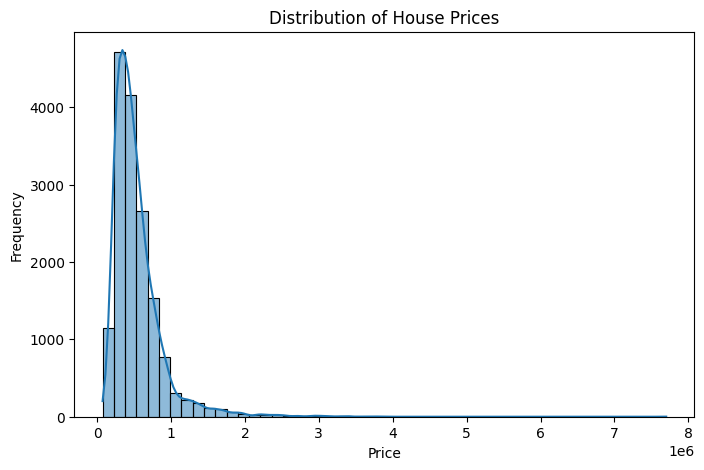

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


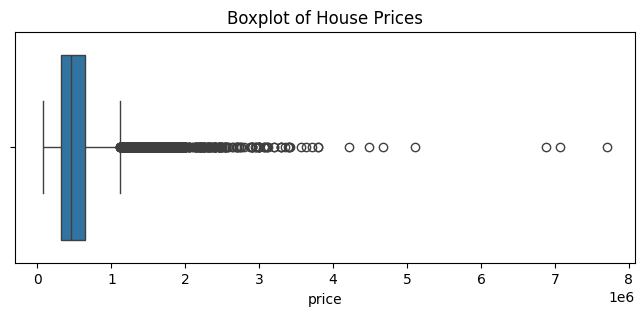

In [ ]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['price'])
plt.title('Boxplot of House Prices')
plt.show()

Univariate Analysis on numerical columns

In [ ]:
df[num_continuous].describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,lat,long,yr_built,yr_renovated,zipcode
count,1.611000e+04,16110.000000,1.611000e+04,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000
mean,5.380323e+05,2075.411421,1.487569e+04,1786.872998,288.538423,1984.516636,12739.404283,47.560692,-122.213899,1971.230664,83.001490,98077.902048
std,3.603598e+05,907.548014,3.887553e+04,822.425006,438.865284,682.117246,26964.164036,0.138435,0.140137,29.384455,398.473237,53.339003
min,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,399.000000,651.000000,47.159300,-122.519000,1900.000000,0.000000,98001.000000
25%,3.220000e+05,1430.000000,5.001000e+03,1200.000000,0.000000,1480.000000,5092.000000,47.472300,-122.328000,1952.000000,0.000000,98033.000000
50%,4.500000e+05,1910.000000,7.589500e+03,1560.000000,0.000000,1840.000000,7615.000000,47.572600,-122.230000,1975.000000,0.000000,98065.000000
75%,6.400000e+05,2550.000000,1.063850e+04,2200.000000,560.000000,2360.000000,10058.750000,47.678200,-122.125000,1997.000000,0.000000,98117.000000
max,7.700000e+06,12050.000000,1.164794e+06,8860.000000,4820.000000,6210.000000,871200.000000,47.777600,-121.315000,2015.000000,2015.000000,98199.000000


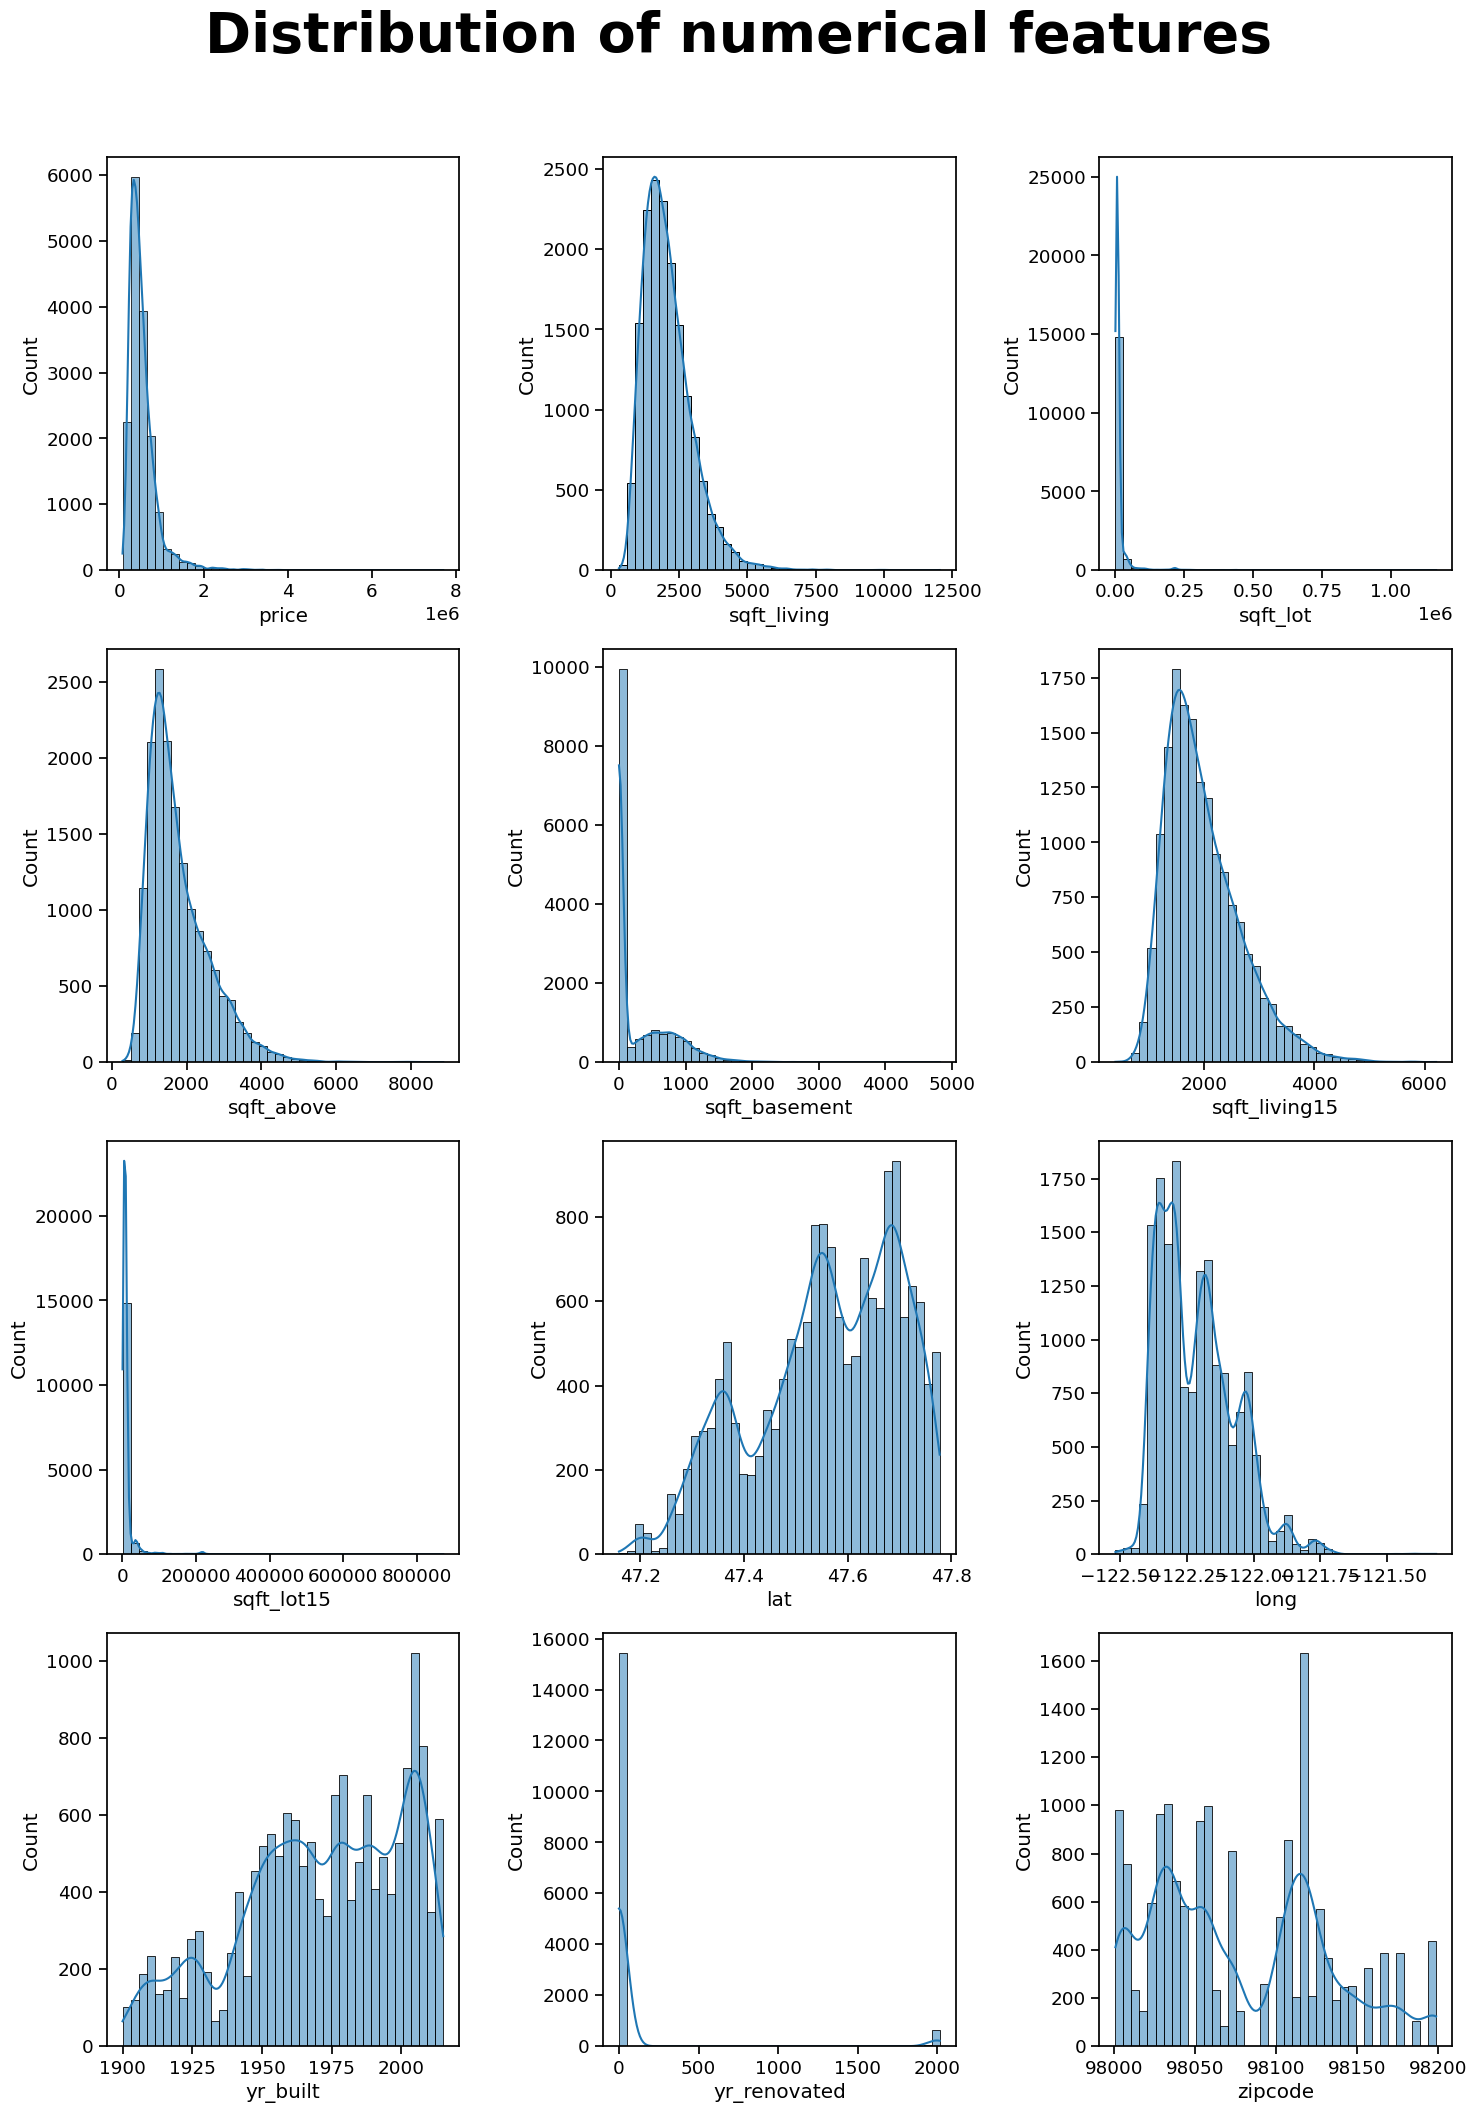

In [ ]:
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(15,25))
plt.suptitle('Distribution of numerical features', fontsize=40, fontweight='bold', y=1.02)

for i,col in enumerate(num_continuous):
  plt.subplot(5, 3, i+1)
  sns.histplot(df[col], bins=40, kde=True)
  plt.xlabel(col)
  plt.tight_layout()


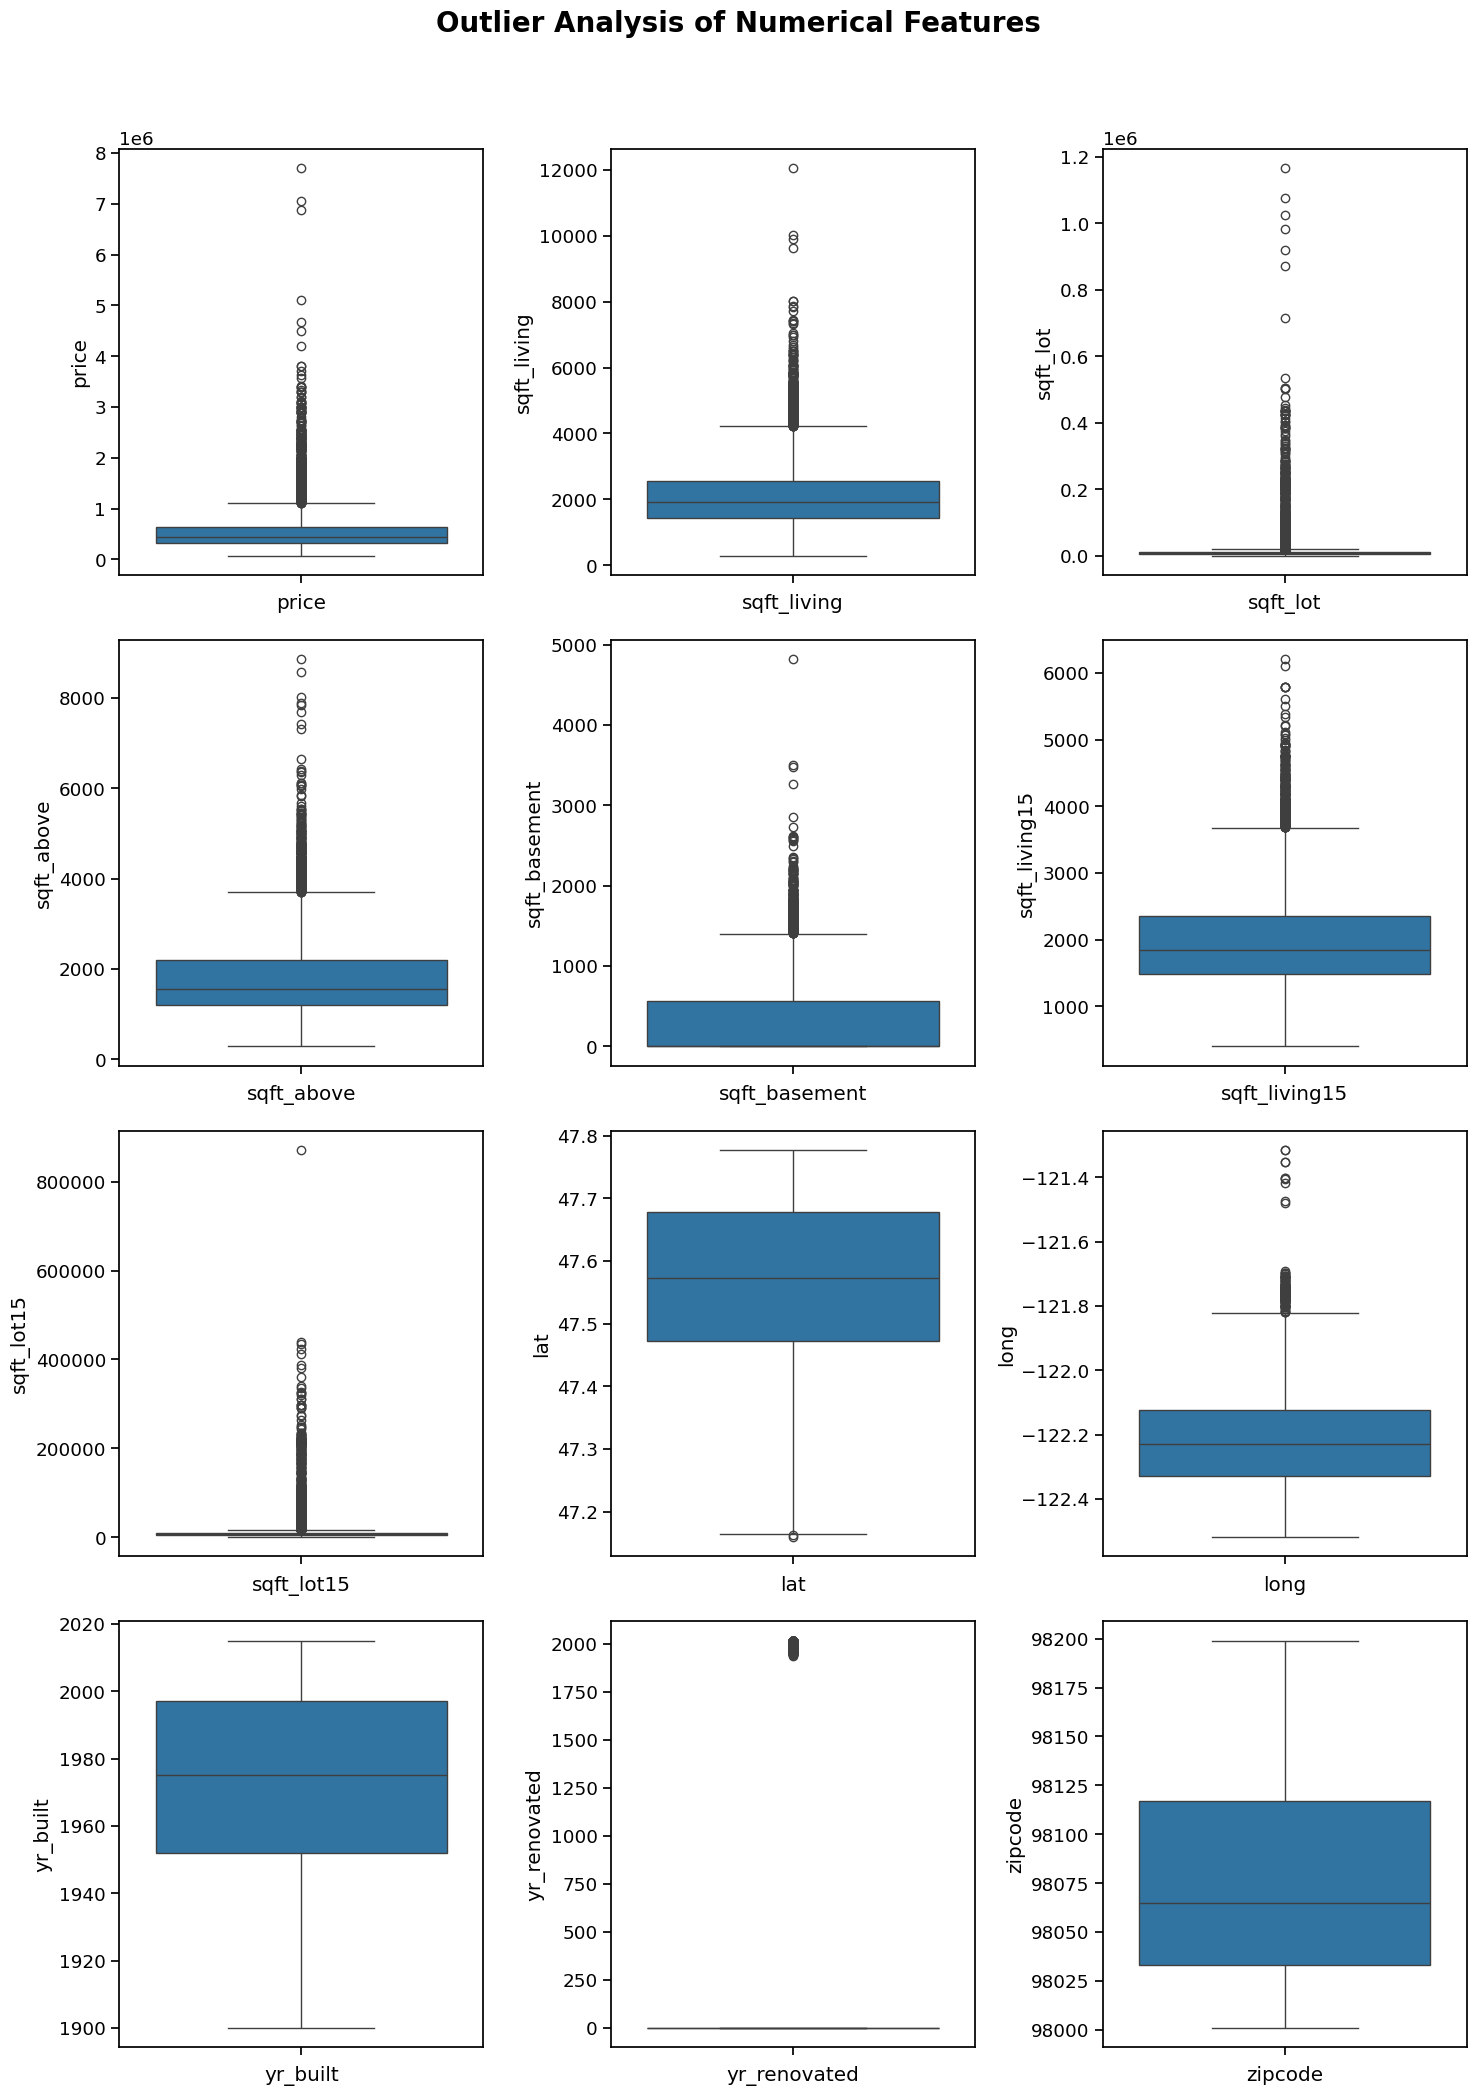

In [ ]:
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(15,25))
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_continuous):
  plt.subplot(5, 3, i+1)
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.tight_layout()

Univariate Analysis on Discrete variables

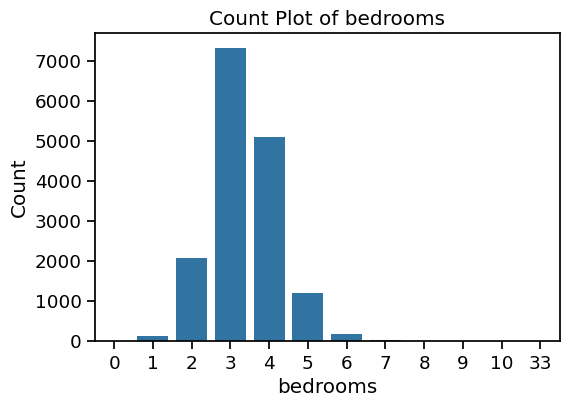

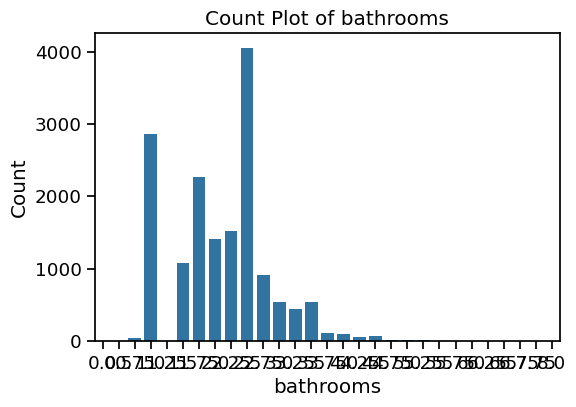

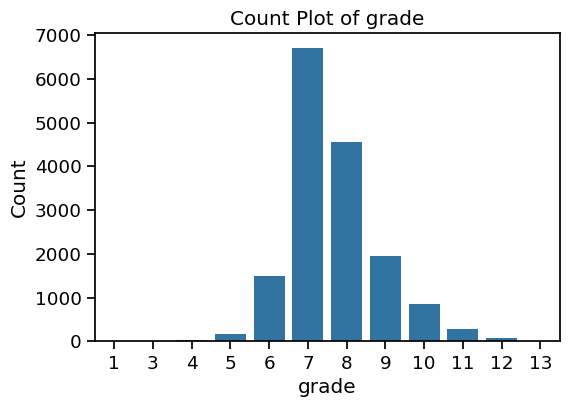

In [ ]:
for col in num_discrete:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



Univariate Analysis on Categoricalvariables

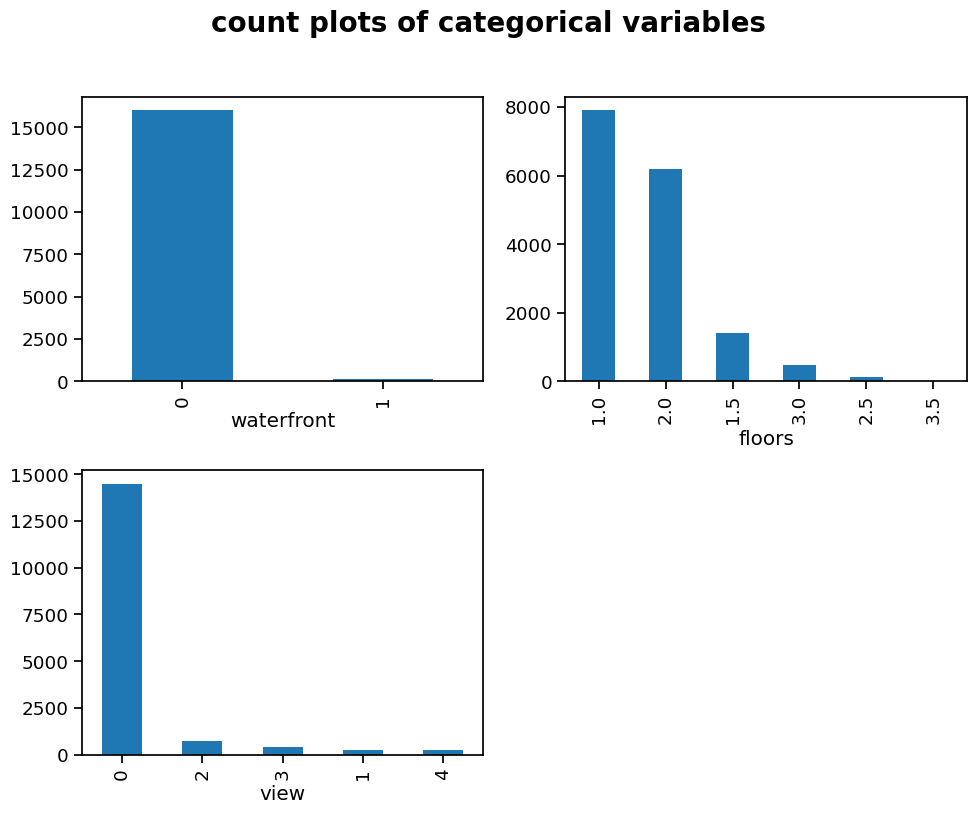

In [ ]:
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(10,8))
plt.suptitle('count plots of categorical variables', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categorical):
  plt.subplot(2, 2, i+1)
  df[col].value_counts().head(10).plot(kind='bar')
  plt.xlabel(col)
  plt.tight_layout()

# Multivariate analysis

Price vs numerical variables

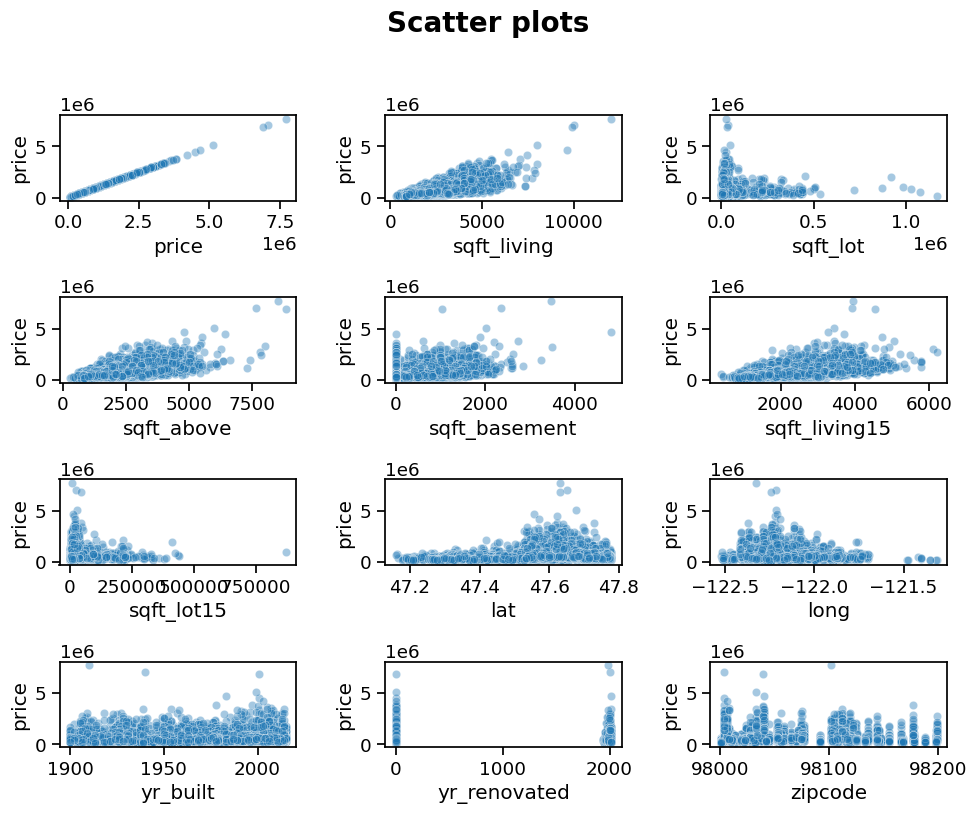

In [ ]:
####### Scatter plots ##########
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(10,8))
plt.suptitle('Scatter plots', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_continuous):
  plt.subplot(4, 3, i+1)
  sns.scatterplot(x=df[col], y=df['price'], alpha=0.4)
  plt.xlabel(col)
  plt.tight_layout()




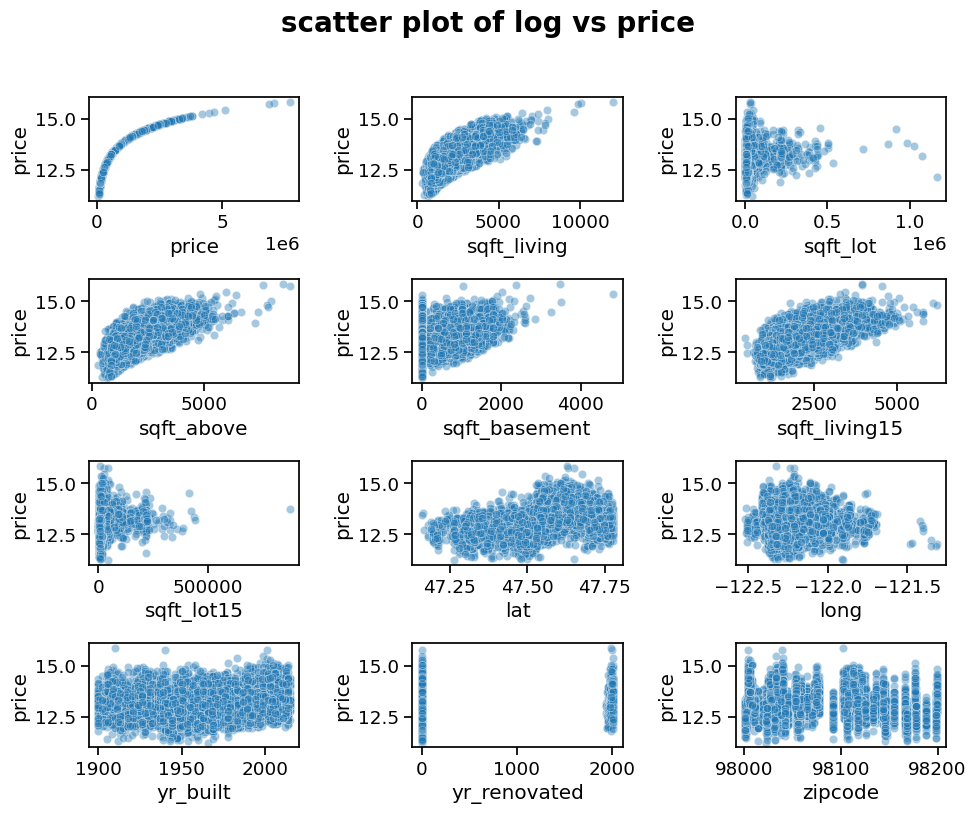

In [ ]:
############ scatter plot of log vs price ##########

sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(10,8))
plt.suptitle('scatter plot of log vs price', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_continuous):
  plt.subplot(4, 3, i+1)
  sns.scatterplot(x=df[col], y=np.log1p(df['price']), alpha=0.4)
  plt.xlabel(col)
  plt.tight_layout()

price vs discrete variables

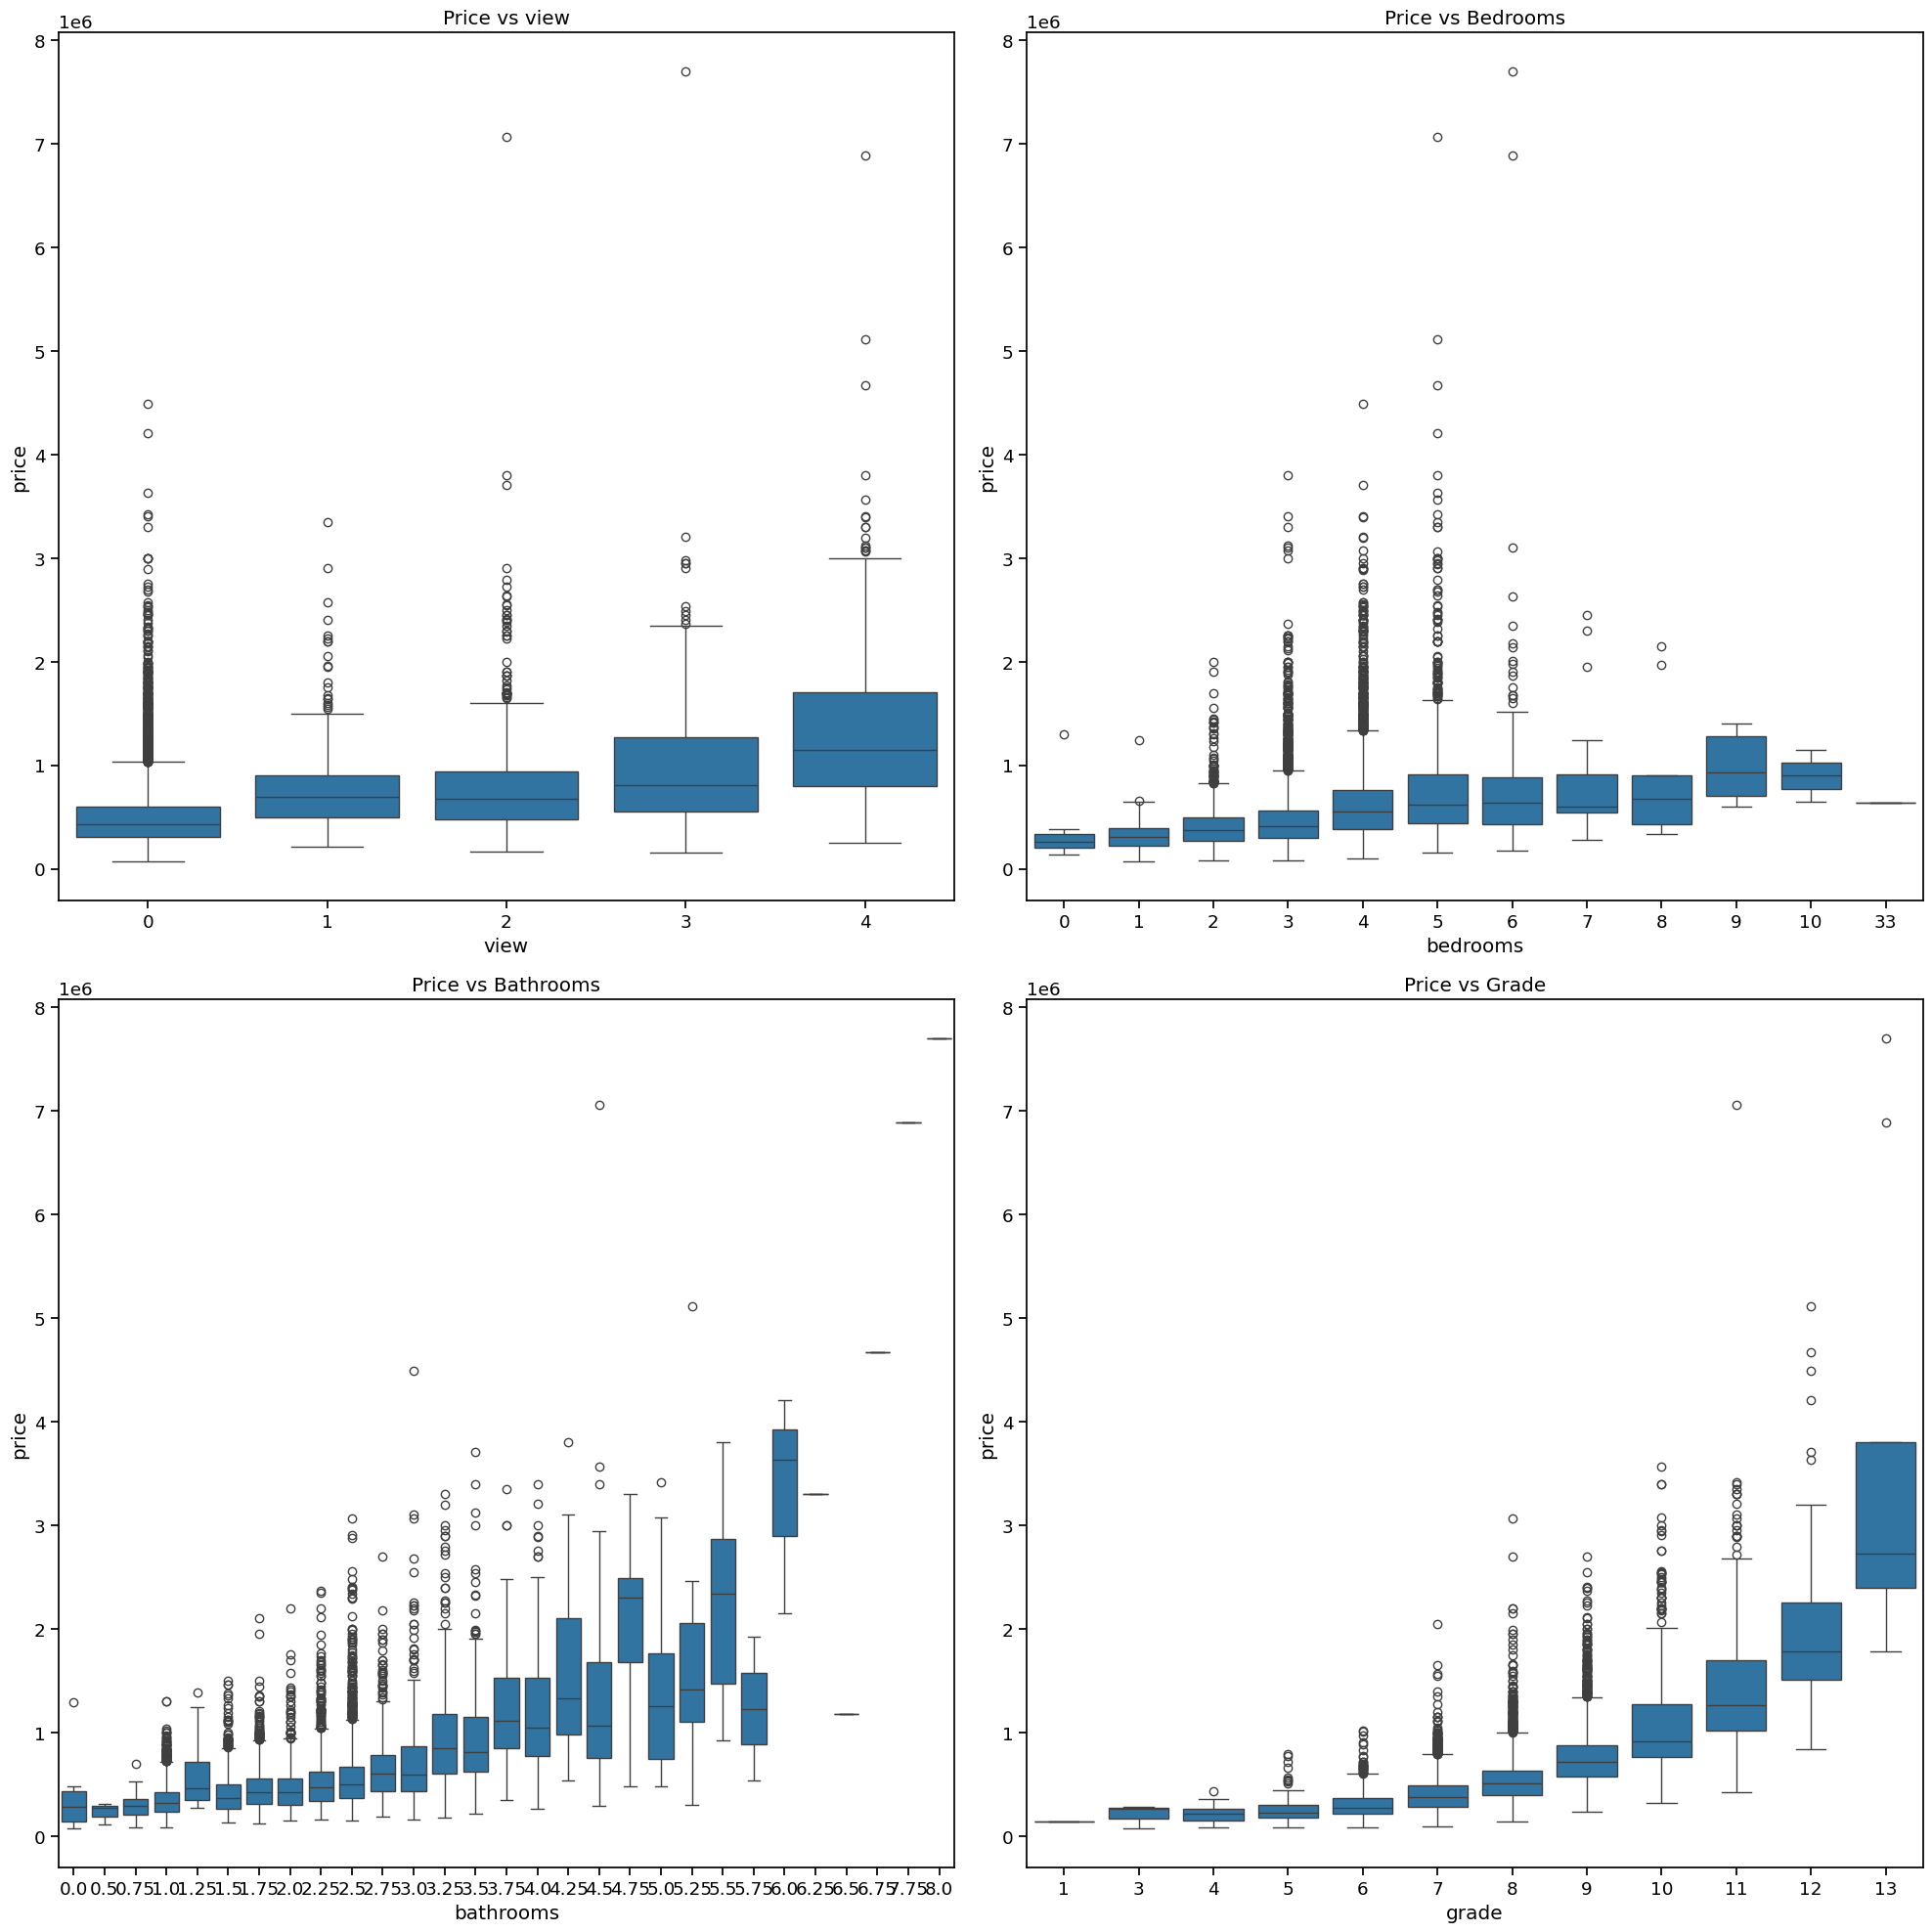

In [ ]:
########### Boxplot comparison ############

fig, axes = plt.subplots(2, 2, figsize=(20,20))
sns.boxplot(ax=axes[0,0], data=df, x="view", y="price")
sns.boxplot(ax=axes[0,1], data=df, x="bedrooms", y="price")
sns.boxplot(ax=axes[1,0], data=df, x="bathrooms", y="price")
sns.boxplot(ax=axes[1,1], data=df, x="grade", y="price")

axes[0,0].set_title("Price vs view")
axes[0,1].set_title("Price vs Bedrooms")
axes[1,0].set_title("Price vs Bathrooms")
axes[1,1].set_title("Price vs Grade")
plt.tight_layout()
plt.show()


price vs categorical variables

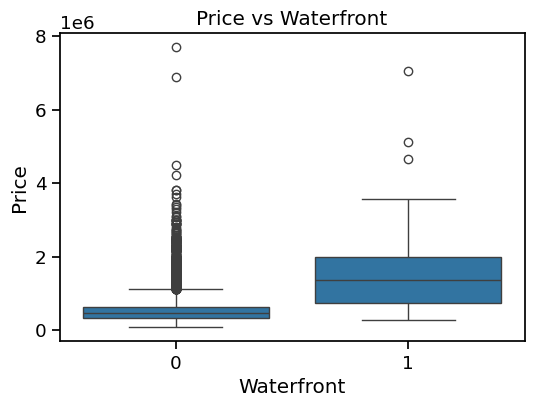

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['waterfront'], y=df['price'])
plt.title('Price vs Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()


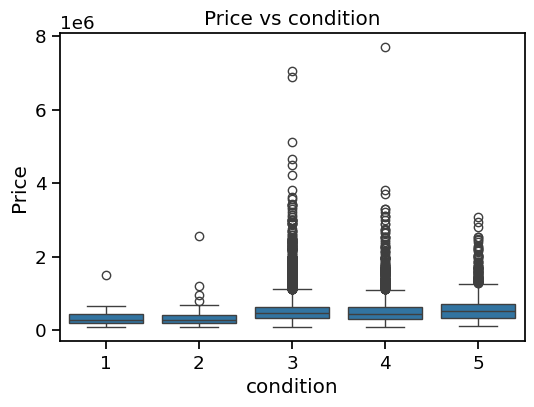

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['condition'], y=df['price'])
plt.title('Price vs condition')
plt.xlabel('condition')
plt.ylabel('Price')
plt.show()


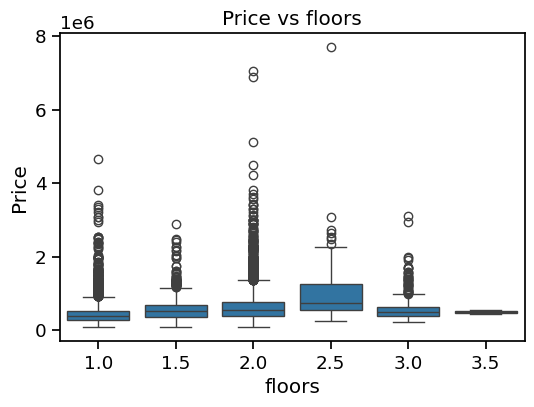

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['floors'], y=df['price'])
plt.title('Price vs floors')
plt.xlabel('floors')
plt.ylabel('Price')
plt.show()


heatmap for numerical variables

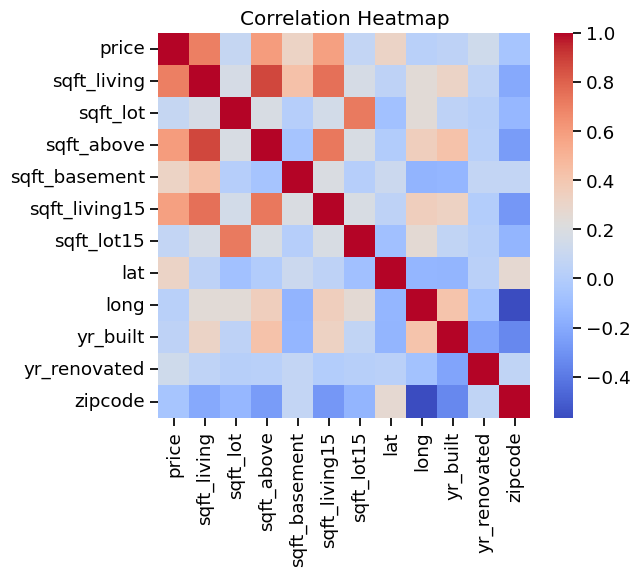

In [ ]:
plt.figure(figsize=(6,5))
corr = df[num_continuous].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Multivariate feature interactions

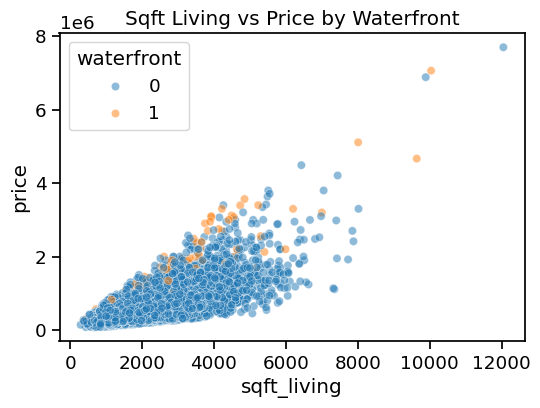

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['sqft_living'], y=df['price'],
                hue=df['waterfront'], alpha=0.5)
plt.title('Sqft Living vs Price by Waterfront')
plt.show()


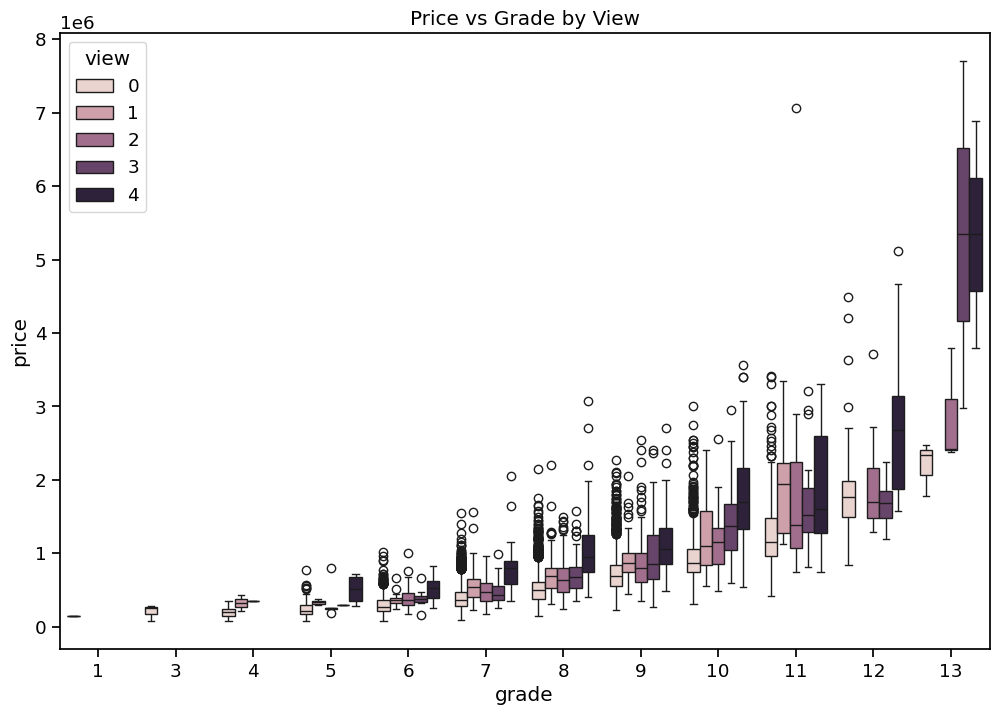

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['grade'], y=df['price'], hue=df['view'])
plt.title('Price vs Grade by View')
plt.show()


Geospatial Analysis

Text(0.5, 1.0, 'Spatial Distribution of House Prices')

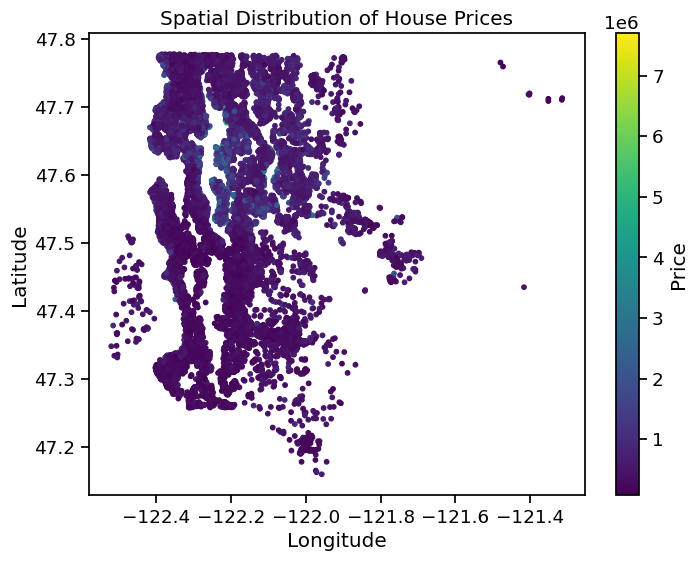

In [ ]:
################# Location Colored by Price ################
plt.figure(figsize=(8,6))
plt.scatter(df['long'], df['lat'],c=df['price'], cmap='viridis', s=10)
plt.colorbar(label='Price')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of House Prices")

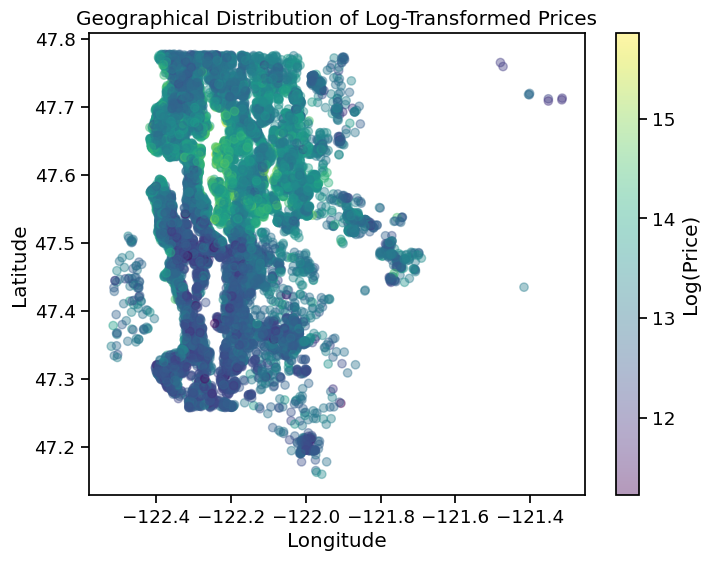

In [ ]:
########### LOG-PRICE GEOSPATIAL VISUALIZATION ##########3
plt.figure(figsize=(8,6))
plt.scatter(df['long'], df['lat'],
            c=np.log1p(df['price']), alpha=0.4)
plt.colorbar(label='Log(Price)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Log-Transformed Prices')
plt.show()


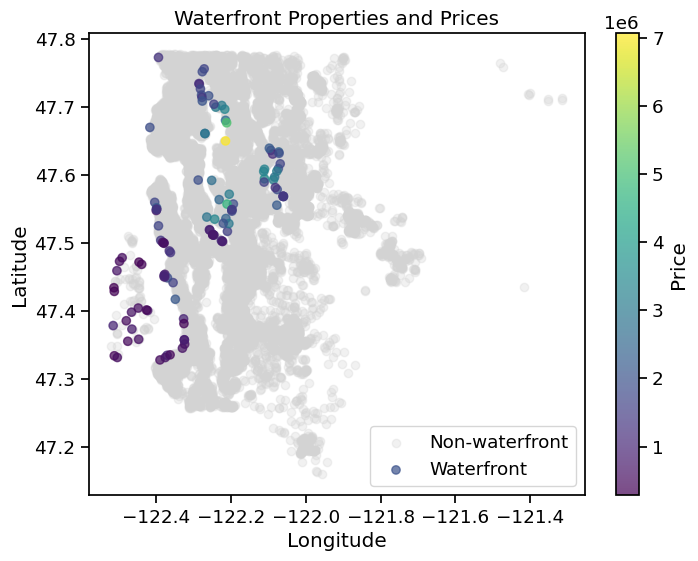

In [ ]:
############ Spatial Distribution Highlighting Waterfront Homes #############
plt.figure(figsize=(8,6))
plt.scatter(df['long'], df['lat'],
            c='lightgrey', alpha=0.3, label='Non-waterfront')

plt.scatter(df[df['waterfront']==1]['long'],
            df[df['waterfront']==1]['lat'],
            c=df[df['waterfront']==1]['price'],
            alpha=0.7, label='Waterfront')

plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Waterfront Properties and Prices')
plt.legend()
plt.show()


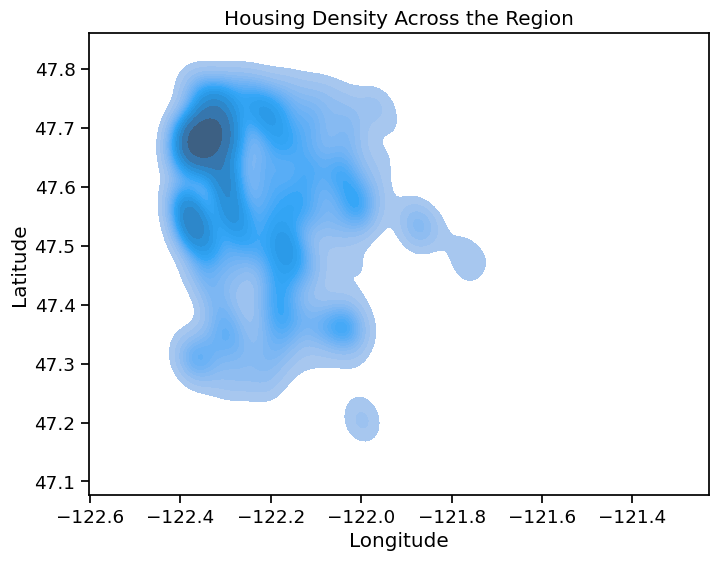

In [ ]:
############# House Density Visualization ############

plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df['long'], y=df['lat'],
    fill=True, levels=20
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Density Across the Region')
plt.show()


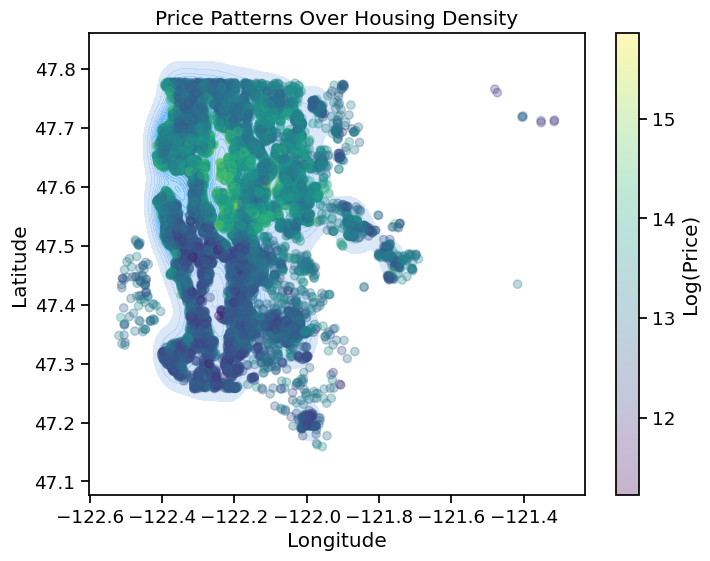

In [ ]:
#################### Price vs Density (Visual Overlay) ################

plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df['long'], y=df['lat'],
    fill=True, levels=15, alpha=0.4
)
plt.scatter(df['long'], df['lat'],
            c=np.log1p(df['price']), alpha=0.3)
plt.colorbar(label='Log(Price)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Patterns Over Housing Density')
plt.show()


ZIPCODE-LEVEL SPATIAL PRICE ANALYSIS

In [ ]:
zip_price = df.groupby('zipcode')['price'].mean().reset_index()


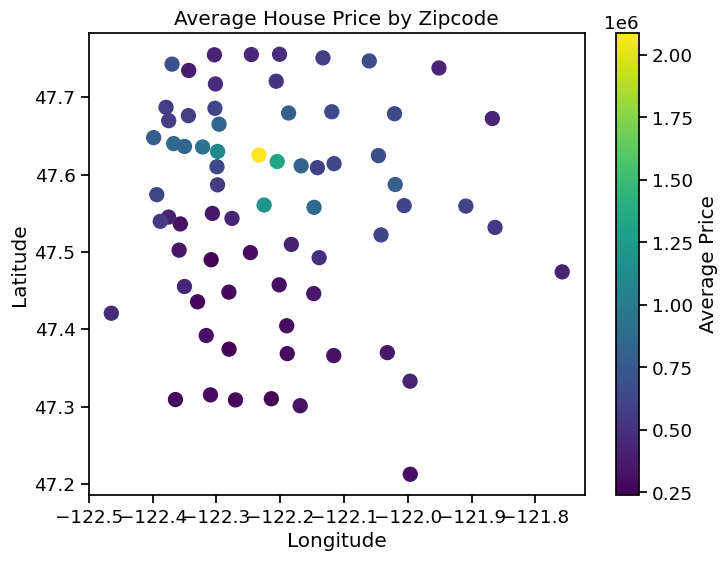

In [ ]:
zip_coords = df.groupby('zipcode')[['lat', 'long']].mean().reset_index()
zip_data = zip_coords.merge(zip_price, on='zipcode')

plt.figure(figsize=(8,6))
plt.scatter(zip_data['long'], zip_data['lat'],
            c=zip_data['price'], s=100)
plt.colorbar(label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average House Price by Zipcode')
plt.show()


Local Neighbourhood effect

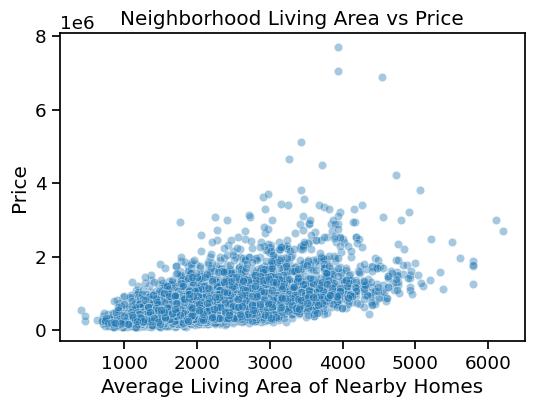

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['sqft_living15'],
                y=df['price'], alpha=0.4)
plt.title('Neighborhood Living Area vs Price')
plt.xlabel('Average Living Area of Nearby Homes')
plt.ylabel('Price')
plt.show()


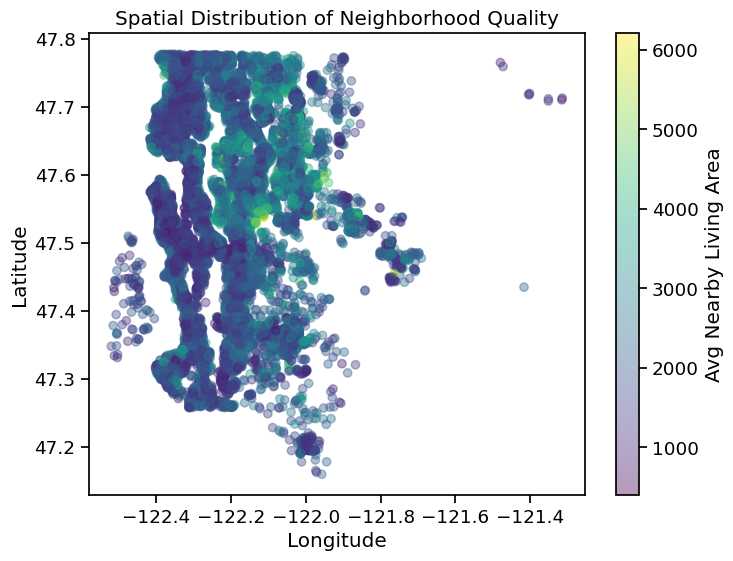

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['long'], df['lat'],
            c=df['sqft_living15'], alpha=0.4)
plt.colorbar(label='Avg Nearby Living Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Neighborhood Quality')
plt.show()


In [ ]:
df.shape

(16110, 21)

# Feature Extraction from images


In [ ]:
############## IMPORTS

import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms

In [ ]:
###### PATHS & CONFIG

IMAGE_DIR = "/content/gdrive/My Drive/CDC_openproject/images/train"
CSV_PATH  = "/content/gdrive/My Drive/CDC_openproject/train.csv"

IMG_SIZE = 224
BATCH_SIZE = 32
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print("Using device:", DEVICE)

Using device: cpu


In [ ]:
############# IMAGE TRANSFORMS

image_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    )
])


In [ ]:
################### LOAD CSV & FILTER VALID IMAGES

df = pd.read_csv(CSV_PATH)
df["id"] = df["id"].astype("int64")
df.drop_duplicates(subset="id", inplace=True)

print("Total rows in train.csv:", len(df))

df["image_path"] = df["id"].apply(
    lambda x: os.path.join(IMAGE_DIR, f"{x}.png")
)

df = df[df["image_path"].apply(os.path.exists)].reset_index(drop=True)

print("Rows with available images:", len(df))


Total rows in train.csv: 16110
Rows with available images: 16110


In [ ]:
################ DATASET CLASS

class SatelliteImageDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "image_path"]
        pid = int(self.df.loc[idx, "id"])
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, pid


In [ ]:
################# DATALOADER

image_dataset = SatelliteImageDataset(
    df=df,
    transform=image_transforms
)

image_loader = DataLoader(
    image_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)

In [ ]:

################# LOAD RESNET50

resnet = models.resnet50(
    weights=models.ResNet50_Weights.IMAGENET1K_V1
)

resnet.fc = nn.Identity()

resnet = resnet.to(DEVICE)
resnet.eval()

EMBEDDING_DIM = 2048

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 130MB/s]


In [ ]:
############# FEATURE EXTRACTION

all_embeddings = []
all_ids = []

with torch.no_grad():
    for images, ids in tqdm(image_loader):
        images = images.to(DEVICE)

        embeddings = resnet(images)

        all_embeddings.append(embeddings.cpu().numpy())

        all_ids.extend([int(x) for x in ids])

100%|██████████| 504/504 [1:06:27<00:00,  7.91s/it]


In [ ]:
############ BUILD FINAL DATAFRAME

image_features = np.vstack(all_embeddings)

print("Final image feature shape:", image_features.shape)

image_features_df = pd.DataFrame(
    image_features,
    columns=[f"img_feat_{i}" for i in range(EMBEDDING_DIM)]
)

image_features_df.insert(0, "id", pd.Series(all_ids, dtype="int64"))

print(image_features_df.dtypes.head())

Final image feature shape: (16110, 2048)
id              int64
img_feat_0    float32
img_feat_1    float32
img_feat_2    float32
img_feat_3    float32
dtype: object


In [ ]:
############ SAVE

image_features_df.to_csv("train_image_features.csv", index=False)

print("Saved: train_image_features.csv")

✅ Saved: train_image_features.csv


Test images


In [ ]:
######### PATHS & CONFIG

IMAGE_DIR = "/content/gdrive/My Drive/CDC_openproject/images/test"
CSV_PATH  = "/content/gdrive/My Drive/CDC_openproject/test.csv"

IMG_SIZE = 224
BATCH_SIZE = 32
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print("Using device:", DEVICE)

Using device: cpu


In [ ]:
########### IMAGE TRANSFORMS

image_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    )
])

In [ ]:
################  LOAD CSV & FILTER VALID IMAGES

df = pd.read_csv(CSV_PATH)


df["id"] = df["id"].astype("int64")

df.drop_duplicates(subset="id", inplace=True)

print("Total rows in train.csv:", len(df))

df["image_path"] = df["id"].apply(
    lambda x: os.path.join(IMAGE_DIR, f"{x}.png")
)

df = df[df["image_path"].apply(os.path.exists)].reset_index(drop=True)

print("Rows with available images:", len(df))

Total rows in train.csv: 5396
Rows with available images: 5396


In [ ]:
################ DATASET CLASS

class SatelliteImageDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "image_path"]
        pid = int(self.df.loc[idx, "id"])

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, pid

In [ ]:
################# DATALOADER

image_dataset = SatelliteImageDataset(
    df=df,
    transform=image_transforms
)

image_loader = DataLoader(
    image_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)

In [ ]:
#################### LOAD RESNET50 (FEATURE EXTRACTOR)

resnet = models.resnet50(
    weights=models.ResNet50_Weights.IMAGENET1K_V1
)

resnet.fc = nn.Identity()

resnet = resnet.to(DEVICE)
resnet.eval()

EMBEDDING_DIM = 2048

In [ ]:
#################### FEATURE EXTRACTION

all_embeddings = []
all_ids = []

with torch.no_grad():
    for images, ids in tqdm(image_loader):
        images = images.to(DEVICE)

        embeddings = resnet(images)  # (B, 2048)

        all_embeddings.append(embeddings.cpu().numpy())

        all_ids.extend([int(x) for x in ids])

100%|██████████| 169/169 [29:02<00:00, 10.31s/it]


In [ ]:
###################### BUILD FINAL DATAFRAME

image_features = np.vstack(all_embeddings)

print("Final image feature shape:", image_features.shape)

image_features_df = pd.DataFrame(
    image_features,
    columns=[f"img_feat_{i}" for i in range(EMBEDDING_DIM)]
)

image_features_df.insert(0, "id", pd.Series(all_ids, dtype="int64"))

print(image_features_df.dtypes.head())

Final image feature shape: (5396, 2048)
id              int64
img_feat_0    float32
img_feat_1    float32
img_feat_2    float32
img_feat_3    float32
dtype: object


In [ ]:
############## SAVE

image_features_df.to_csv("test_image_features.csv", index=False)

print("Saved: test_image_features.csv")

✅ Saved: test_image_features.csv


# Grad Cam Analysis

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")

low_q  = df["price"].quantile(0.2)
mid_q  = df["price"].quantile(0.5)
high_q = df["price"].quantile(0.8)

low_sample  = df.iloc[(df["price"] - low_q).abs().argsort()[:1]]
mid_sample  = df.iloc[(df["price"] - mid_q).abs().argsort()[:1]]
high_sample = df.iloc[(df["price"] - high_q).abs().argsort()[:1]]

selected_df = pd.concat([low_sample, mid_sample, high_sample])

print(selected_df[["id", "price"]])


               id   price
8286    301401410  298000
12277  3629960550  450000
7694   8901500178  700000


In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

resnet = models.resnet50(
    weights=models.ResNet50_Weights.IMAGENET1K_V1
)
resnet.fc = nn.Identity()
resnet = resnet.to(DEVICE)
resnet.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
target_layer = resnet.layer4[-1]


In [ ]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def generate(self, input_tensor):
        output = self.model(input_tensor)
        score = output.mean()
        self.model.zero_grad()
        score.backward()

        weights = self.gradients.mean(dim=(2, 3), keepdim=True)
        cam = (weights * self.activations).sum(dim=1)
        cam = torch.relu(cam)

        cam = cam.squeeze().cpu().detach().numpy()
        cam = cv2.resize(cam, (224, 224))
        cam = (cam - cam.min()) / (cam.max() + 1e-8)

        return cam


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    )
])


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


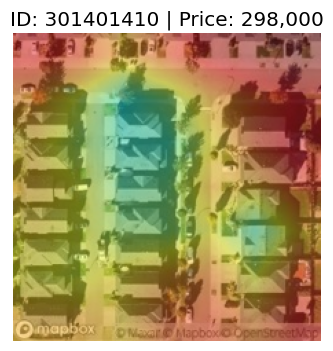

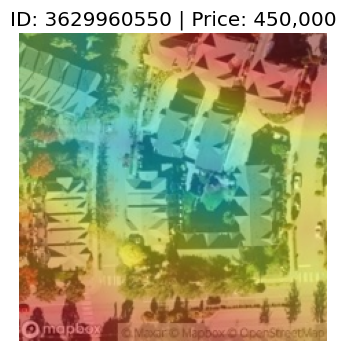

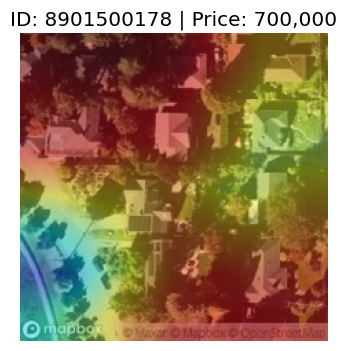

In [ ]:
import matplotlib.pyplot as plt
import os

IMAGE_DIR = "/content/gdrive/My Drive/CDC_openproject/images/train"

gradcam = GradCAM(resnet, target_layer)

for _, row in selected_df.iterrows():
    pid = row["id"]
    price = row["price"]

    img_path = os.path.join(IMAGE_DIR, f"{pid}.png")
    image = Image.open(img_path).convert("RGB")

    input_tensor = transform(image).unsqueeze(0).to(DEVICE)

    cam = gradcam.generate(input_tensor)

    img_np = np.array(image.resize((224,224)))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img_np, 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(4,4))
    plt.imshow(overlay)
    plt.title(f"ID: {pid} | Price: {price:,.0f}")
    plt.axis("off")
    plt.show()
